In [107]:
import numpy as np
from glob import glob
from skimage.morphology import skeletonize_3d
from medutils.medutils import load_itk, save_itk
import SimpleITK as sitk
import itk
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage.morphology import disk,diamond,rectangle,square,erosion,dilation,opening,closing,skeletonize
import pickle


In [70]:
a = np.zeros((20, 20, 20))

In [71]:
a.shape

(20, 20, 20)

In [2]:
import numpy as np

a = np.random.random((3,3))
b = [0,0]
# a is an numpy.ndarray，b is the coordinate of one element, how to get the corresponding element from a?
c = a[b[0], b[1]] # This is okay but not good, because if a is a N-dim array, length of b would be also N, then this line would become very long.

In [3]:
d = a[tuple(b)]

In [5]:
c

0.3883375923698268

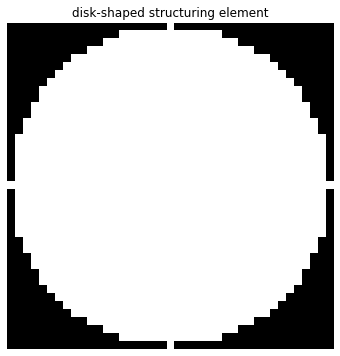

In [72]:
se = disk(20)  # radius=20
plt.figure(figsize=(6,6))
plt.imshow(se, cmap='gray')
plt.title('disk-shaped structuring element')
plt.axis('off')
plt.show()

In [73]:
b = [se for i in range(1000)]

In [74]:
c = np.array(b)

In [75]:
c.shape

(1000, 41, 41)

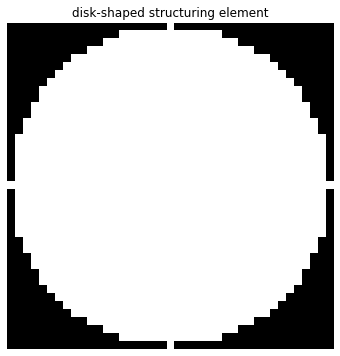

In [76]:
plt.figure(figsize=(6,6))
plt.imshow(c[5], cmap='gray')
plt.title('disk-shaped structuring element')
plt.axis('off')
plt.show()

In [77]:
ori1 = np.array([0.,0.,0.])
sp1 = np.array([1.,1.,1.])
fpath1 = 'results/cylinder_sp1.mha'
save_itk(fpath1, c, ori1, sp1)

In [78]:
ori2 = ori1
sp2 = np.array([20.,20.,20.])
fpath2 = 'results/cylinder_sp2.mha'
save_itk(fpath2, c, ori2, sp2)

In [79]:
image1_itk = itk.imread(fpath1)
skeleton1_itk = itk.MedialThicknessImageFilter3D.New(image1_itk)
itk.imwrite(skeleton1_itk, fpath1.replace('.mha', '_skeleton_itk.mha'))


image1_sitk = sitk.ReadImage(fpath1)
image1_np = sitk.GetArrayFromImage(image1_sitk)
skeleton1_ski = skeletonize_3d(image1_np)
save_itk(fpath1.replace('.mha', '_skeleton_ski.mha'), skeleton1_ski, ori1, sp1)

Downcasting int16 to uint8 without scaling because max value 1 fits in uint8


In [80]:
image2_itk = itk.imread(fpath2)
skeleton2_itk = itk.MedialThicknessImageFilter3D.New(image2_itk)
itk.imwrite(skeleton2_itk, fpath2.replace('.mha', '_skeleton_itk.mha'))

image2_sitk = sitk.ReadImage(fpath2)
image2_np = sitk.GetArrayFromImage(image2_sitk)
skeleton2_ski = skeletonize_3d(image2_np)
save_itk(fpath2.replace('.mha', '_skeleton_ski.mha'), skeleton2_ski, ori2, sp2)

In [81]:
skeleton2_ski.shape

(1000, 41, 41)

In [82]:
x,y,z = skeleton2_ski.shape

In [83]:
xs, ys, zs = np.mgrid[:x, :y, :z]

In [84]:
out = np.column_stack((xs.ravel(),ys.ravel(),zs.ravel(), skeleton2_ski.ravel()))

In [85]:
out


array([[  0,   0,   0,   0],
       [  0,   0,   1,   0],
       [  0,   0,   2,   0],
       ...,
       [999,  40,  38,   0],
       [999,  40,  39,   0],
       [999,  40,  40,   0]])

In [86]:
out2=np.array([i for i in out if i[-1]>0])

In [87]:
out2

array([[ 13,  20,  20,   1],
       [ 14,  20,  20,   1],
       [ 15,  20,  20,   1],
       ...,
       [984,  20,  20,   1],
       [985,  20,  20,   1],
       [986,  20,  20,   1]])

# Convert vessel skeleton to point cloud type: list of cooridanates and radius

In [88]:
from glob import glob
from tqdm import tqdm

In [113]:
vessel_skeleton_ls = glob('/home/jjia/data/dataset/lung_function/ori_resolution/SSc_patient_*_skeleton.mha')


In [90]:
vessel_skeleton_ls

['/home/jjia/data/dataset/lung_function/ori_resolution/SSc_patient_4254486_skeleton.mha',
 '/home/jjia/data/dataset/lung_function/ori_resolution/SSc_patient_8910414_skeleton.mha',
 '/home/jjia/data/dataset/lung_function/ori_resolution/SSc_patient_2332035_skeleton.mha',
 '/home/jjia/data/dataset/lung_function/ori_resolution/SSc_patient_7200070_skeleton.mha',
 '/home/jjia/data/dataset/lung_function/ori_resolution/SSc_patient_2087864_skeleton.mha',
 '/home/jjia/data/dataset/lung_function/ori_resolution/SSc_patient_7886110_skeleton.mha',
 '/home/jjia/data/dataset/lung_function/ori_resolution/SSc_patient_3034278_skeleton.mha',
 '/home/jjia/data/dataset/lung_function/ori_resolution/SSc_patient_3195140_skeleton.mha',
 '/home/jjia/data/dataset/lung_function/ori_resolution/SSc_patient_8189796_skeleton.mha',
 '/home/jjia/data/dataset/lung_function/ori_resolution/SSc_patient_9364092_skeleton.mha',
 '/home/jjia/data/dataset/lung_function/ori_resolution/SSc_patient_1244023_skeleton.mha',
 '/home/jj

In [114]:
len(vessel_skeleton_ls)

333

## Try one at first

In [92]:
skeleton = load_itk(vessel_skeleton_ls[0])

In [93]:
skeleton.shape

(1026, 512, 512)

In [94]:
x,y,z = skeleton.shape
xs, ys, zs = np.mgrid[:x, :y, :z]
out = np.column_stack((xs.ravel(),ys.ravel(),zs.ravel(), skeleton.ravel()))
out2=out[out[:, -1]>0]

KeyboardInterrupt: 

In [ ]:
out.shape

(268959744, 4)

In [ ]:
out2.shape

(63984, 4)

In [ ]:
out2.shape

(63984, 4)

In [ ]:
out2.shape[0]/out.shape[0]

0.00023789433707967837

## Run all images

In [117]:
for skeleton_fpath in tqdm(vessel_skeleton_ls):
    if not os.path.exists(skeleton_fpath.replace('.mha', '_coordinates.pt')):
        skeleton, ori, sp = load_itk(skeleton_fpath, require_ori_sp=True)
        x,y,z = skeleton.shape
        xs, ys, zs = np.mgrid[:x, :y, :z]
        out = np.column_stack((xs.ravel(),ys.ravel(),zs.ravel(), skeleton.ravel()))
        out2= out[out[:, -1]>0]
        out_dt = {'data': out2, 'origin':ori, 'spacing':sp}
        pickle.dump(out_dt, open(skeleton_fpath.replace('.mha', '_coordinates.pt'), "wb"))

        # np.save(skeleton_fpath.replace('.mha', '_coordinates.npy'), out2)

100%|██████████| 333/333 [00:15<00:00, 21.69it/s]


In [118]:
len_ls = []
for skeleton_fpath in tqdm(vessel_skeleton_ls):
    pth = skeleton_fpath.replace('.mha', '_coordinates.npy')
    npy = np.load(pth)
    a = len(npy)
    # print(a)
    len_ls.append(a)



100%|██████████| 333/333 [00:04<00:00, 69.77it/s]


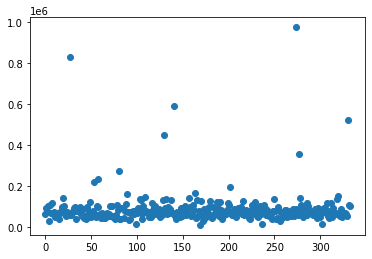

In [119]:
plt.figure()
plt.scatter(x=range(len(len_ls)), y=len_ls)
plt.show()

In [102]:
sorted(len_ls)[::-1][:20]

[974385,
 829135,
 587528,
 519476,
 450324,
 354677,
 273243,
 231410,
 217551,
 192917,
 162560,
 158006,
 150815,
 142853,
 141590,
 140242,
 139527,
 137727,
 137294,
 134395]

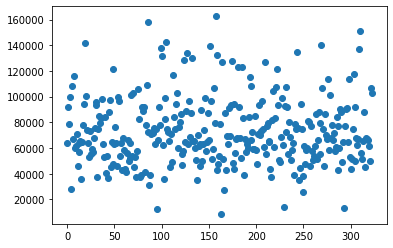

In [123]:
len_ls_remove10highest = [i for i in len_ls if i < 170000]
plt.figure()
plt.scatter(x=range(len(len_ls_remove10highest)), y=len_ls_remove10highest)
plt.show()

## Resample image to align input for PointNet
I decided to select 120,000 as the number of points for all input images.
So I need to upsample the majority of images to over 120,000 points then do some sampling (keep the original voxels!).

**A challenge is that there is still some space to improve for the vessel segmentation results (remove fissures, remove noises, etc). If the vessel segmentation results were updated in the future, should I re-calculate the skeleton (20 mins per CT), save the results, re-upsampling (3 mins per CT) the skeleton results, save their results, and re-train the network?**